In [2]:
import os, sys, time
sys.path.append("../src")

from tqdm.notebook import tqdm
import pandas as pd
import json
import numpy as np
from collections import defaultdict
from scipy import stats
from datasets import load_from_disk
from transformers import ViTForImageClassification
from utils.helper import get_device, get_corruption_types
from utils.vit_util import transforms, transforms_c100
from utils.constant import ViTExperiment
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import seaborn as sns
sns.set_style("ticks")
import torch
device = get_device()

2024-09-03 09:55:48.616603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-03 09:55:49.824897: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-09-03 09:55:49.825023: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-09-03 09:55:49.825035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Device: cuda


In [3]:
ds_name = "c100"
# pretrained modelのロード
pretrained_dir = getattr(ViTExperiment, ds_name).OUTPUT_DIR
model = ViTForImageClassification.from_pretrained(pretrained_dir).to(device)
model.eval()
# 対象の設定
start_li = 1
# start_li = 0
end_li = model.vit.config.num_hidden_layers
ct_list = get_corruption_types()

# datasetごとに違う変数のセット
if ds_name == "c10":
    tf_func = transforms
    label_col = "label"
    num_labels = 10
elif ds_name == "c100":
    tf_func = transforms_c100
    label_col = "fine_label"
    num_labels = 100
else:
    NotImplementedError


used_column: train

target corruption type: ori, cor
vscores shape: (3072, 11)
target corruption type: ori, mis
vscores shape: (3072, 11)
sum(condition)=308


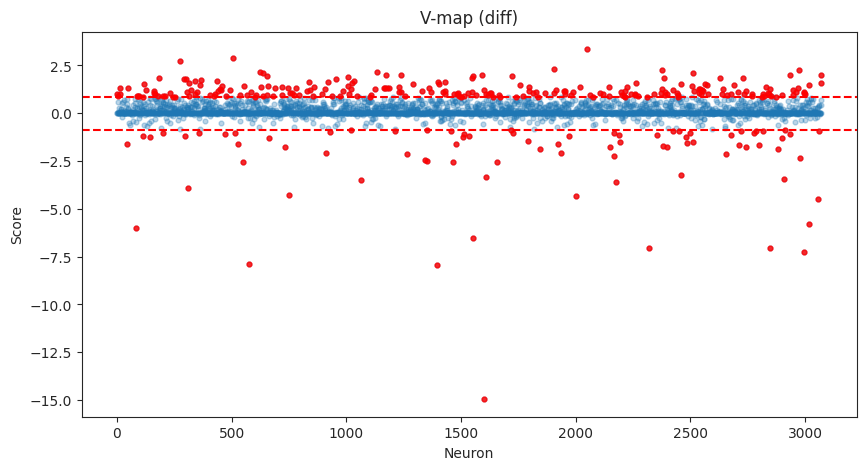

[0.99454328 0.97684155 0.99294376 0.98399785 0.97406566 0.97116955
 0.98160159 0.9823611  0.8989328  0.82931069 0.79499284]


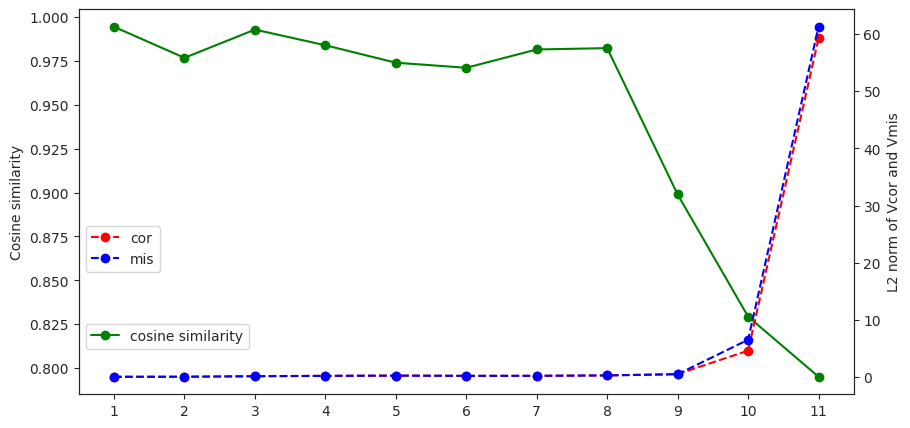

target corruption type: defocus_blur, cor
vscores shape: (3072, 11)
target corruption type: defocus_blur, mis
vscores shape: (3072, 11)
sum(condition)=308


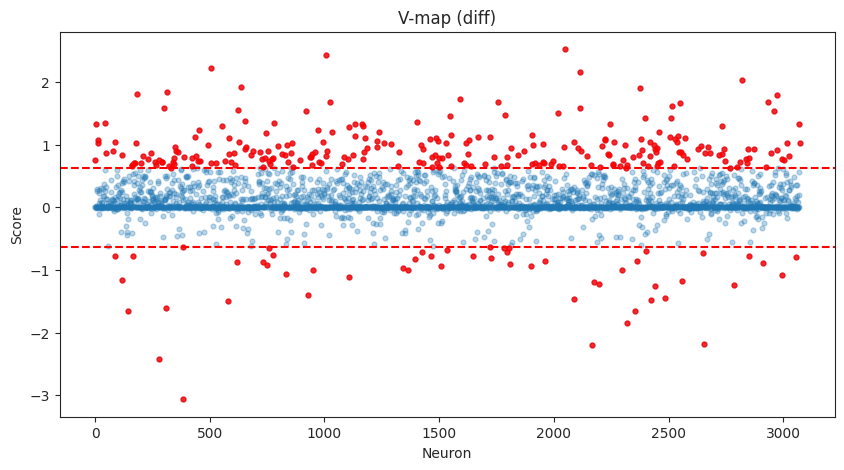

[0.99608278 0.99367826 0.99278408 0.99355821 0.98997922 0.98986704
 0.99590757 0.99260081 0.99143453 0.89518257 0.92122806]


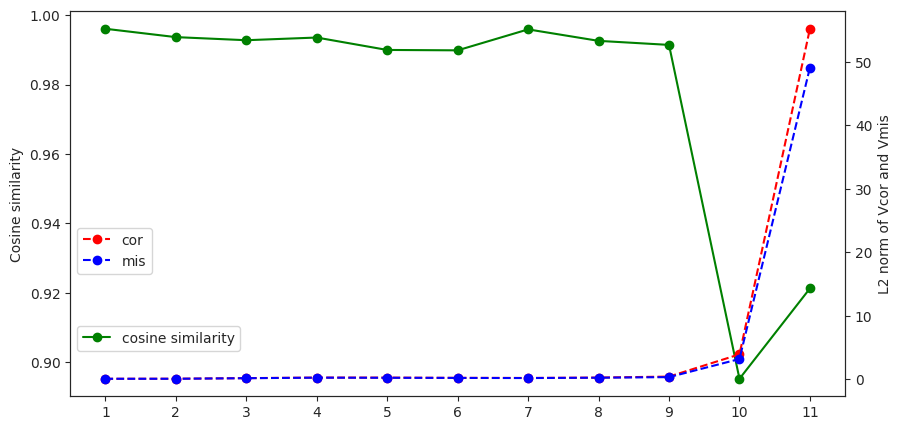

target corruption type: jpeg_compression, cor
vscores shape: (3072, 11)
target corruption type: jpeg_compression, mis
vscores shape: (3072, 11)
sum(condition)=308


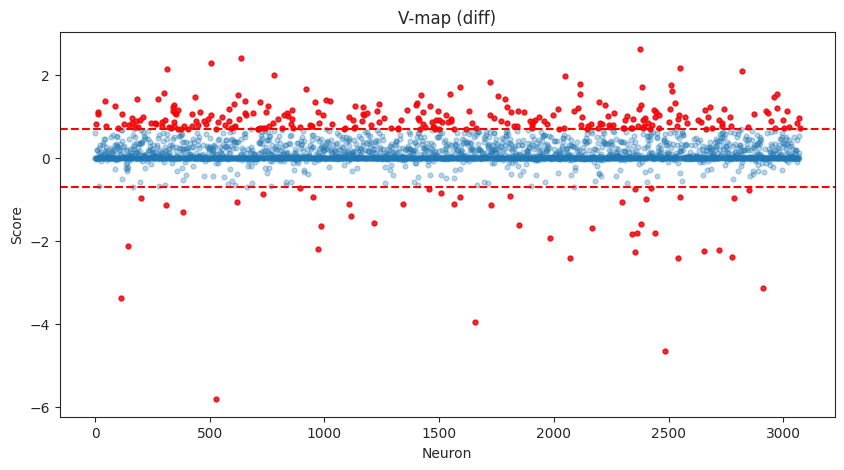

[0.99362994 0.99373817 0.9979619  0.99183186 0.99094002 0.98786751
 0.99246156 0.99559411 0.99167608 0.90169023 0.88489051]


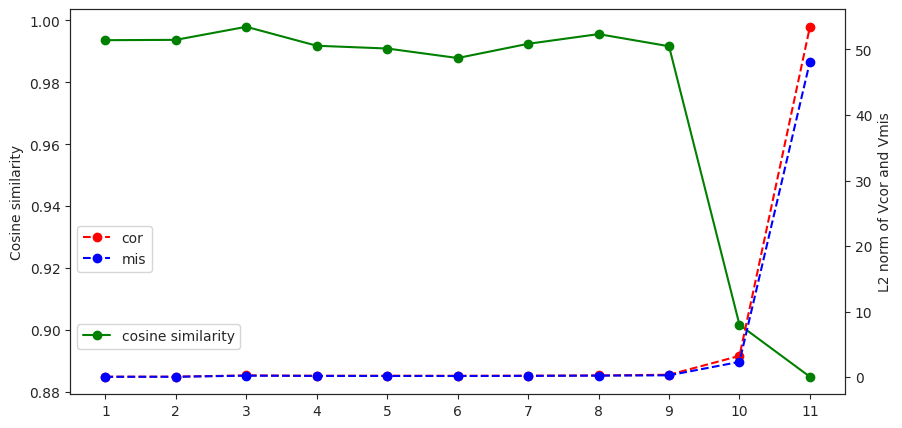

target corruption type: zoom_blur, cor
vscores shape: (3072, 11)
target corruption type: zoom_blur, mis
vscores shape: (3072, 11)
sum(condition)=308


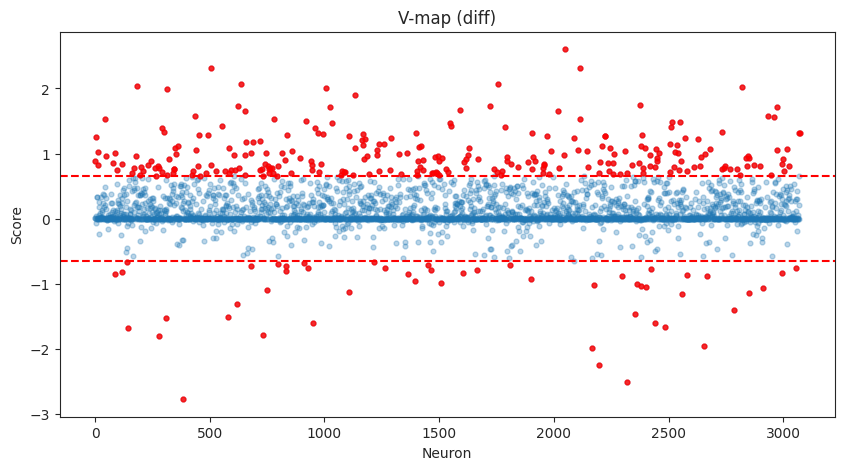

[0.99564904 0.98705851 0.99186291 0.9914874  0.98641387 0.98990098
 0.99478816 0.9905504  0.97831889 0.91336385 0.91553483]


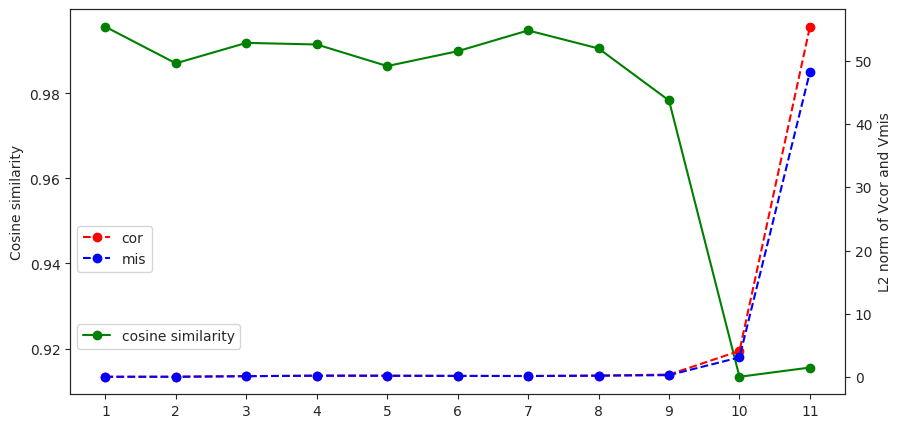

target corruption type: gaussian_noise, cor
vscores shape: (3072, 11)
target corruption type: gaussian_noise, mis
vscores shape: (3072, 11)
sum(condition)=308


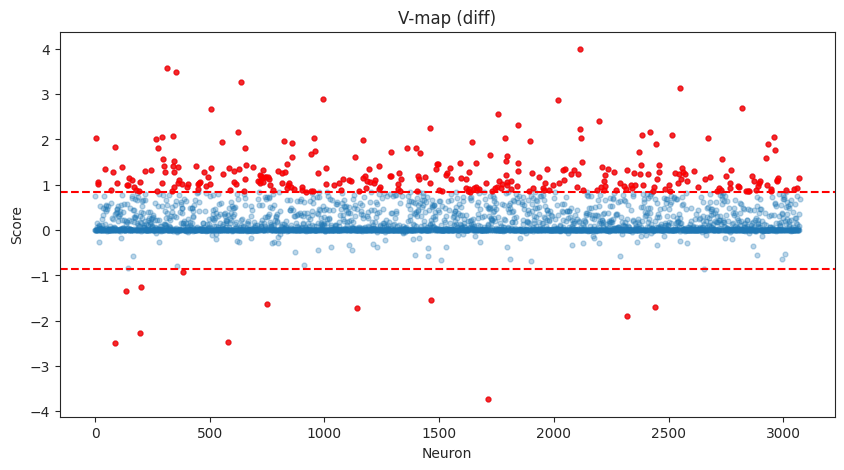

[0.98731405 0.9830232  0.99123548 0.98664914 0.97743216 0.97789564
 0.97915183 0.98477338 0.97733811 0.85765961 0.84856934]


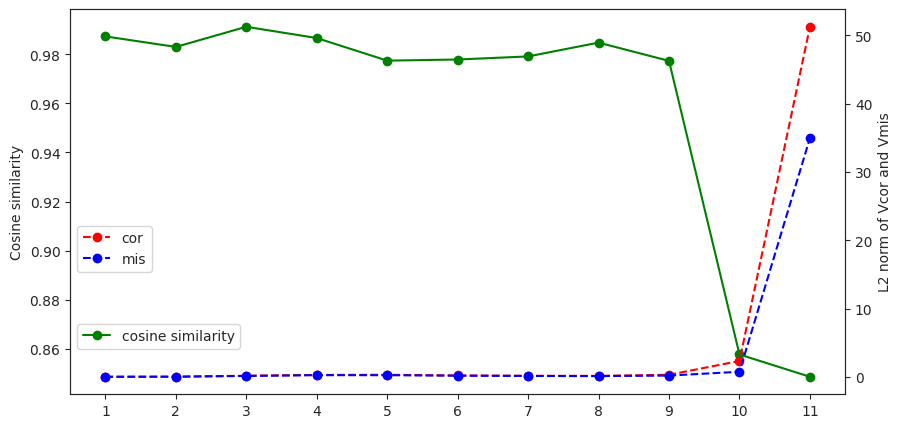

target corruption type: gaussian_blur, cor
vscores shape: (3072, 11)
target corruption type: gaussian_blur, mis
vscores shape: (3072, 11)
sum(condition)=308


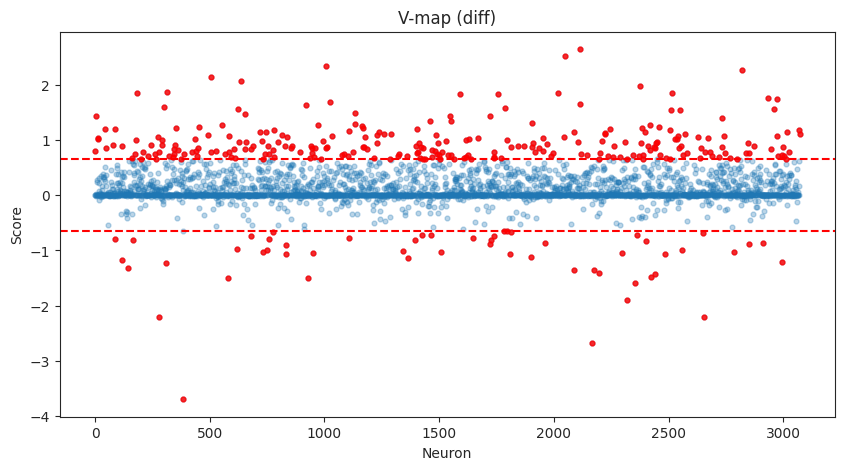

[0.99604685 0.99535445 0.99364617 0.99291736 0.9890036  0.99043314
 0.99549834 0.99321569 0.99107215 0.91039282 0.91579422]


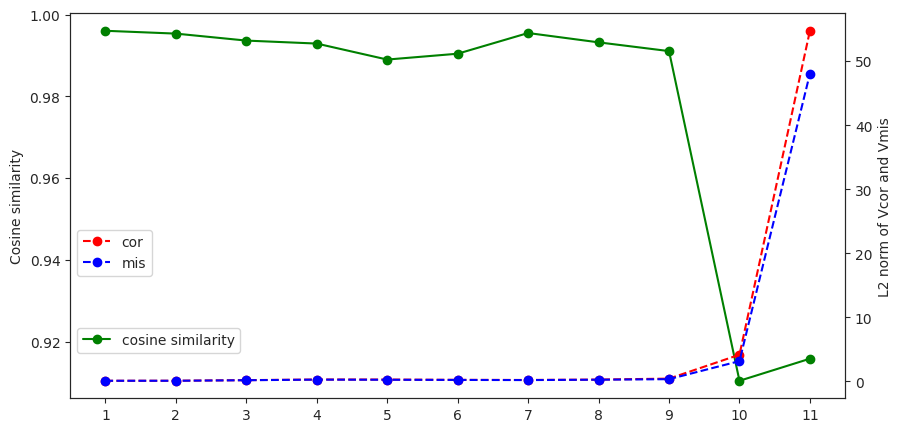

target corruption type: spatter, cor
vscores shape: (3072, 11)
target corruption type: spatter, mis
vscores shape: (3072, 11)
sum(condition)=308


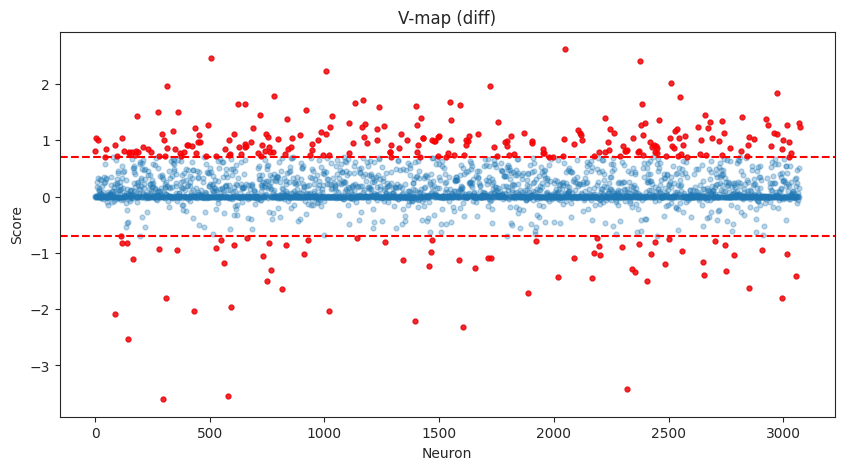

[0.99446177 0.98891599 0.99504495 0.99451783 0.99381292 0.99299169
 0.99354704 0.99176967 0.99258104 0.88748525 0.90583373]


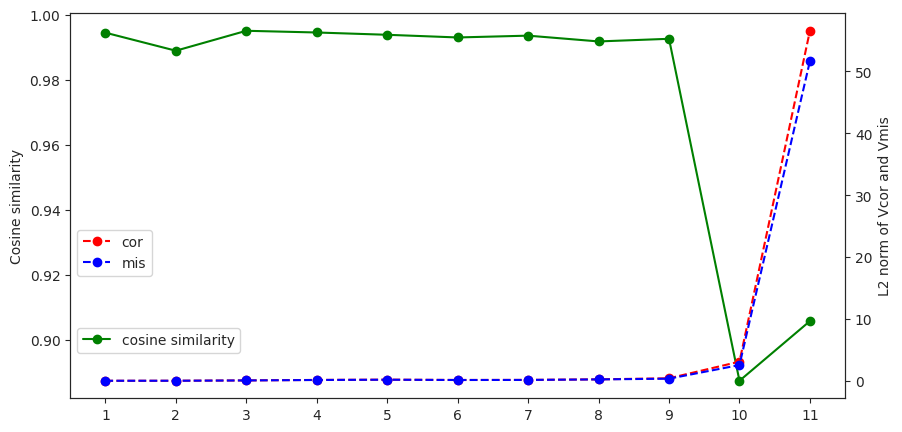

target corruption type: contrast, cor
vscores shape: (3072, 11)
target corruption type: contrast, mis
vscores shape: (3072, 11)
sum(condition)=308


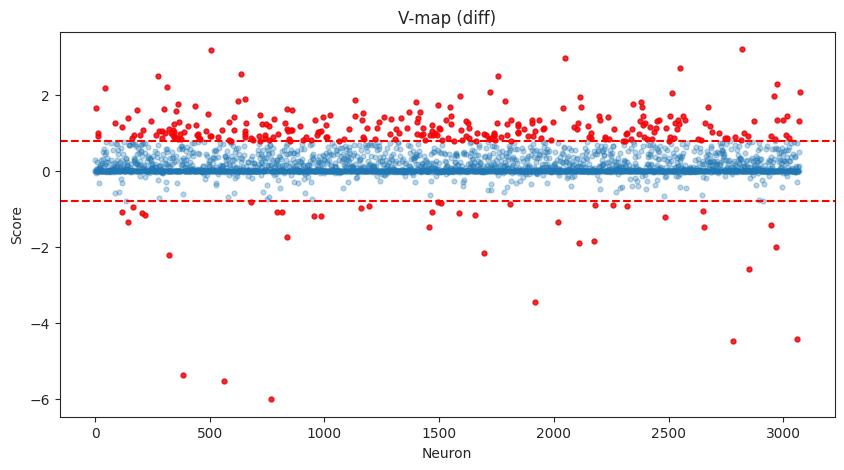

[0.99778748 0.9947142  0.99146652 0.98717262 0.98991617 0.98214059
 0.99409786 0.99241783 0.98949825 0.92418867 0.84189216]


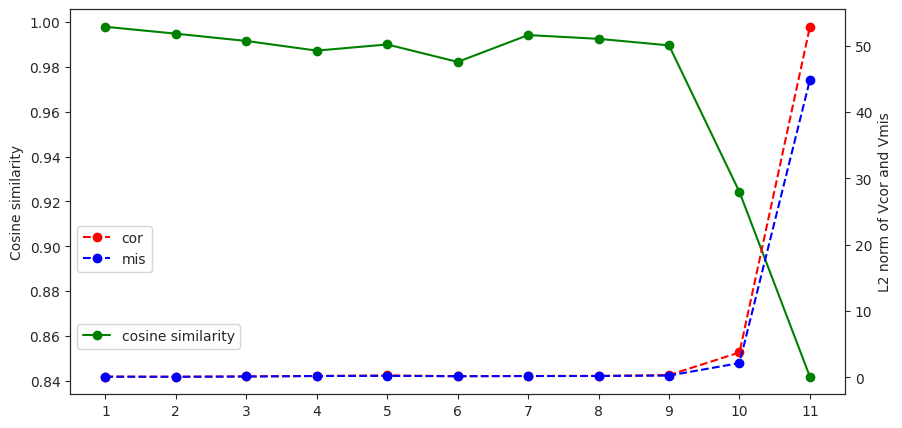

target corruption type: brightness, cor
vscores shape: (3072, 11)
target corruption type: brightness, mis
vscores shape: (3072, 11)
sum(condition)=308


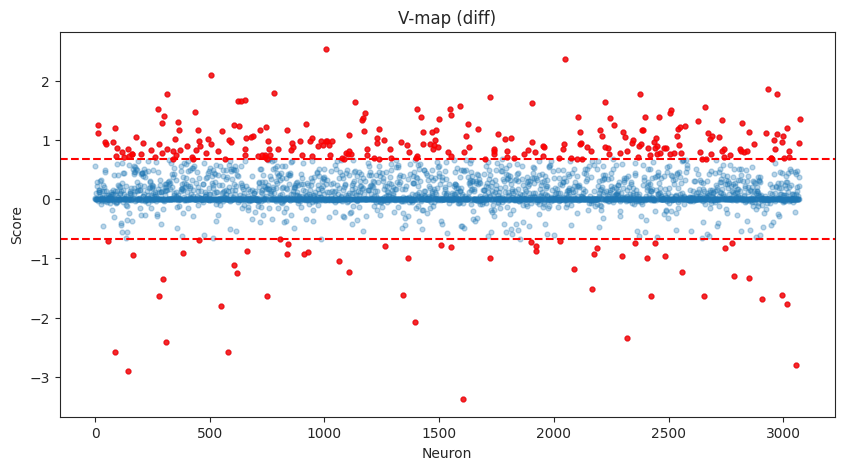

[0.99628017 0.98871441 0.99637386 0.98924638 0.99359711 0.99343239
 0.99444875 0.99132294 0.99012083 0.84177006 0.91388057]


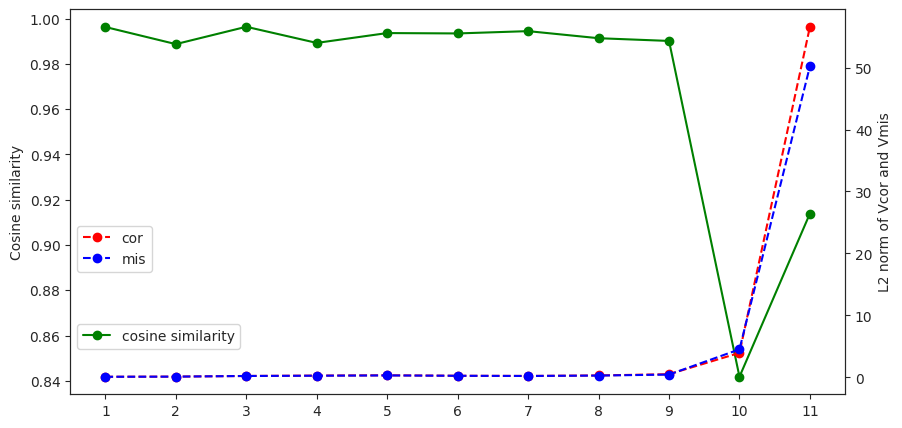

target corruption type: shot_noise, cor
vscores shape: (3072, 11)
target corruption type: shot_noise, mis
vscores shape: (3072, 11)
sum(condition)=308


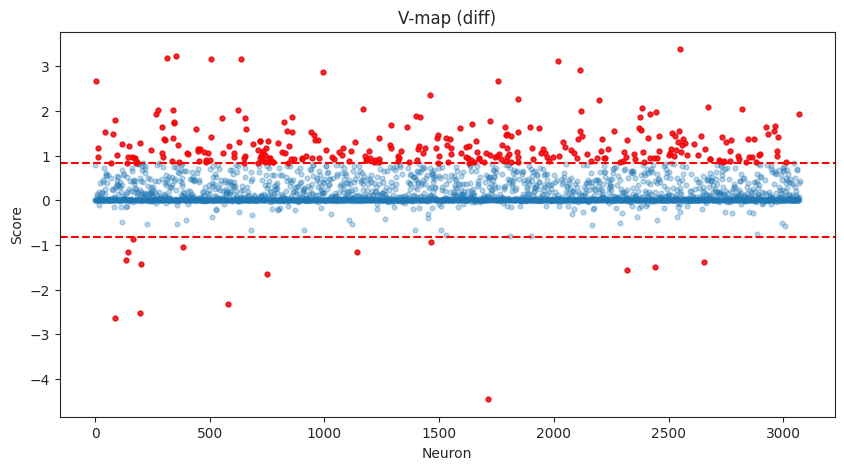

[0.98859342 0.99084169 0.9932142  0.98914633 0.98683312 0.98350462
 0.98398508 0.98926367 0.98819165 0.87335519 0.85590507]


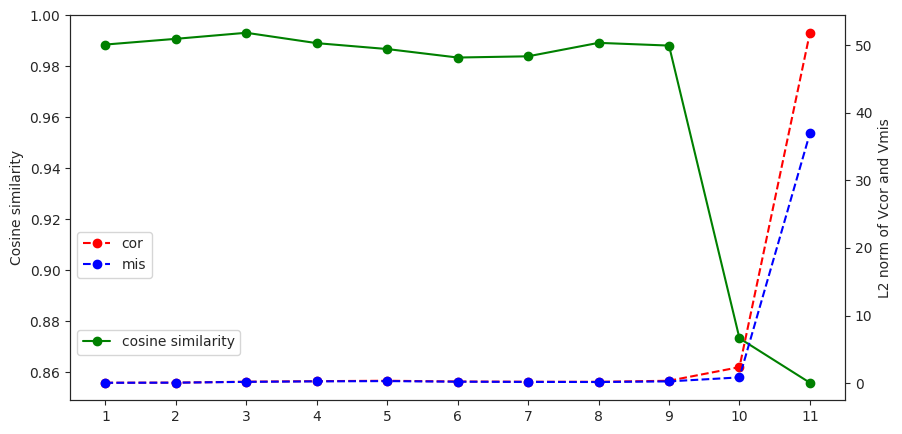

target corruption type: snow, cor
vscores shape: (3072, 11)
target corruption type: snow, mis
vscores shape: (3072, 11)
sum(condition)=308


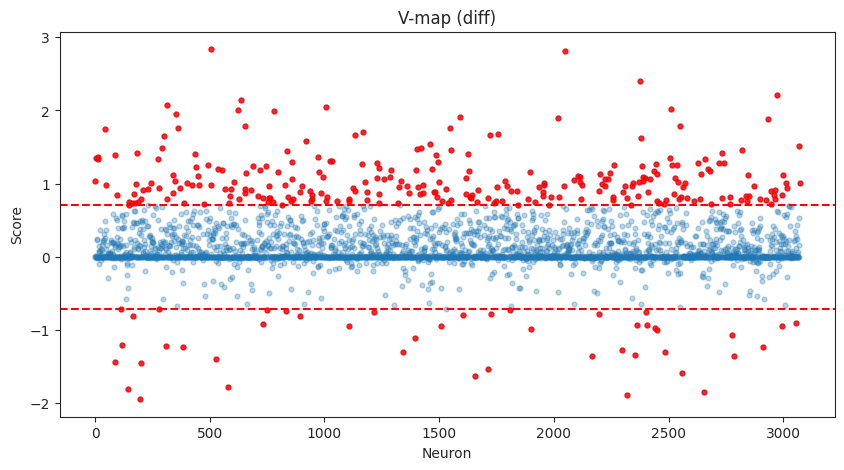

[0.99711084 0.99507887 0.99608818 0.9949284  0.99424323 0.98914613
 0.99310607 0.99153229 0.99218114 0.90482757 0.91161584]


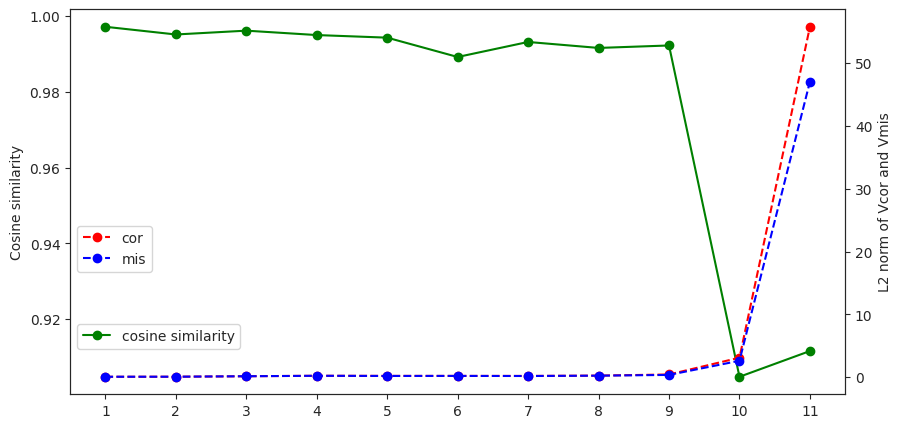

target corruption type: frost, cor
vscores shape: (3072, 11)
target corruption type: frost, mis
vscores shape: (3072, 11)
sum(condition)=308


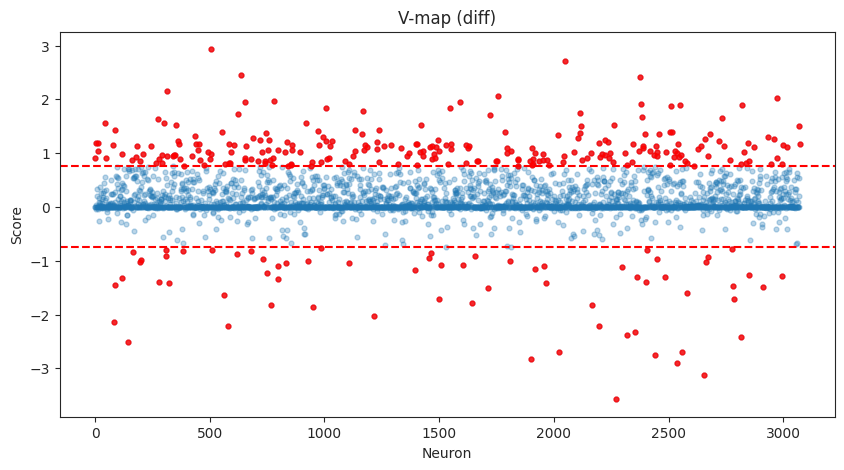

[0.9955221  0.98751181 0.99565512 0.99113964 0.9844579  0.98255489
 0.99023837 0.99253434 0.99259781 0.91128236 0.88400607]


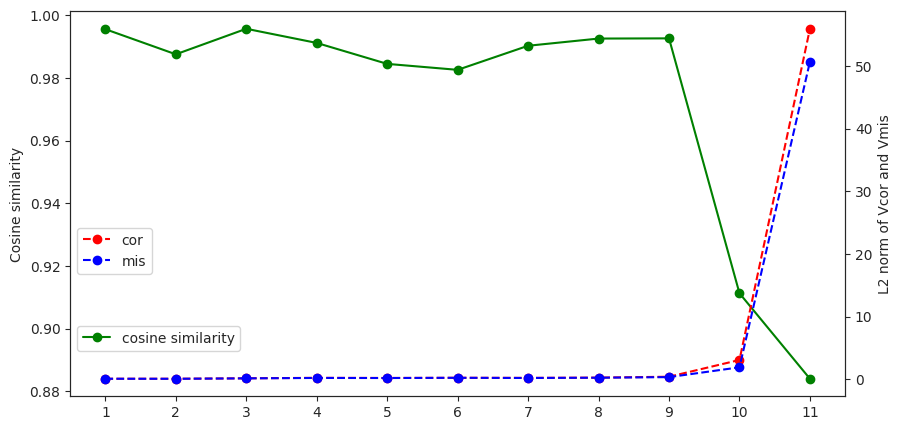

target corruption type: fog, cor
vscores shape: (3072, 11)
target corruption type: fog, mis
vscores shape: (3072, 11)
sum(condition)=308


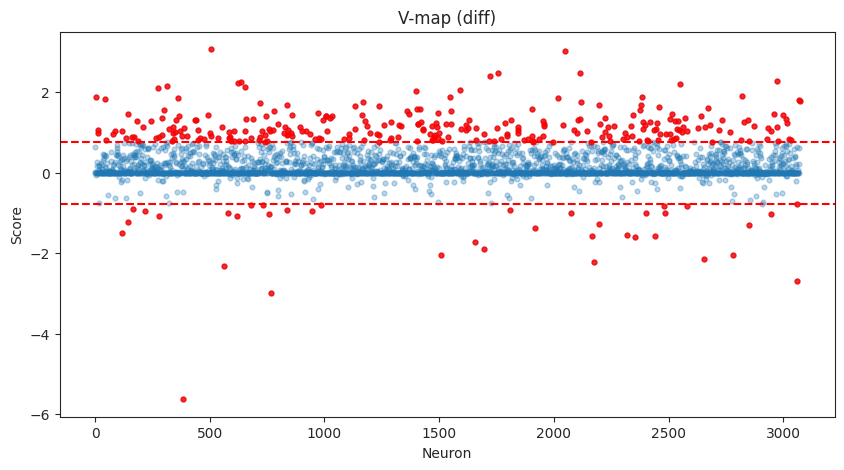

[0.99651694 0.9897857  0.99510903 0.9924438  0.98542678 0.98198673
 0.99186965 0.99425406 0.99125793 0.91093154 0.873577  ]


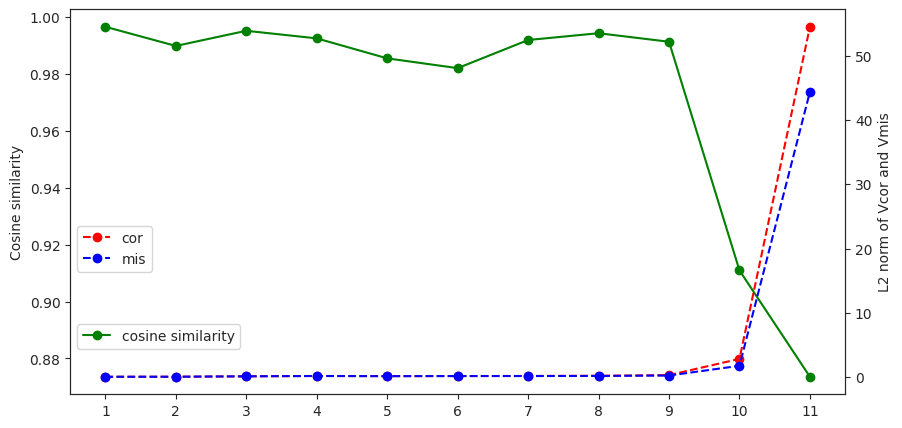

target corruption type: motion_blur, cor
vscores shape: (3072, 11)
target corruption type: motion_blur, mis
vscores shape: (3072, 11)
sum(condition)=308


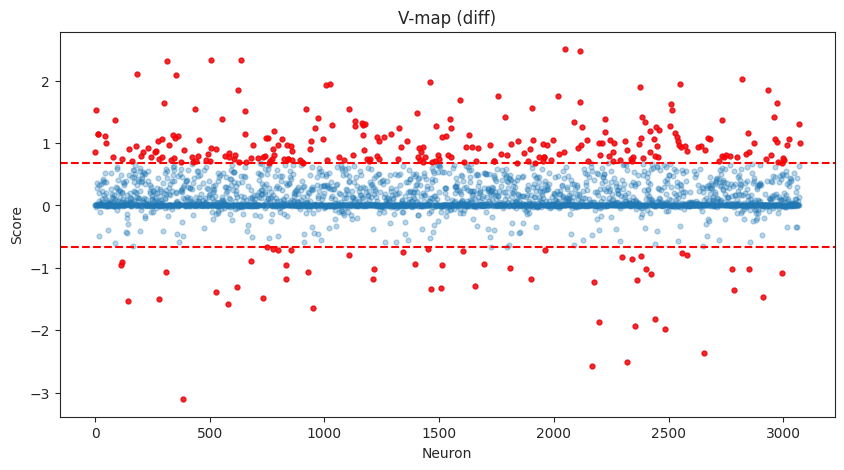

[0.9950891  0.98839494 0.99159846 0.9905909  0.98434631 0.9879708
 0.99253146 0.99074788 0.99144108 0.9125605  0.90228996]


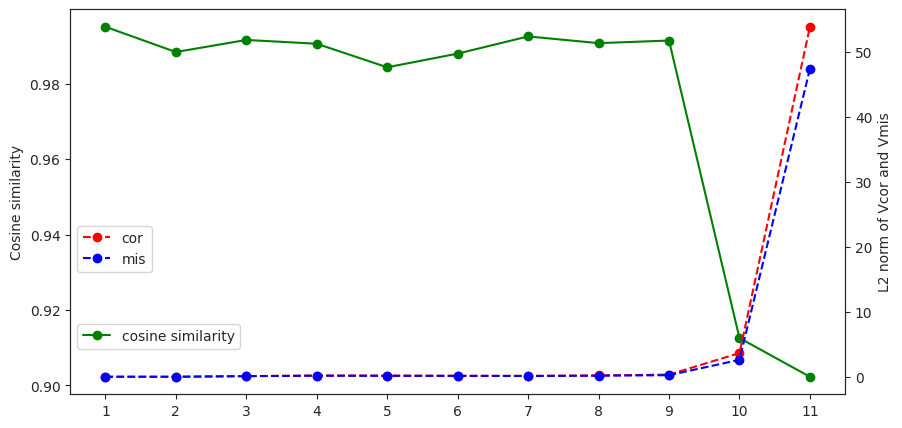

target corruption type: saturate, cor
vscores shape: (3072, 11)
target corruption type: saturate, mis
vscores shape: (3072, 11)
sum(condition)=308


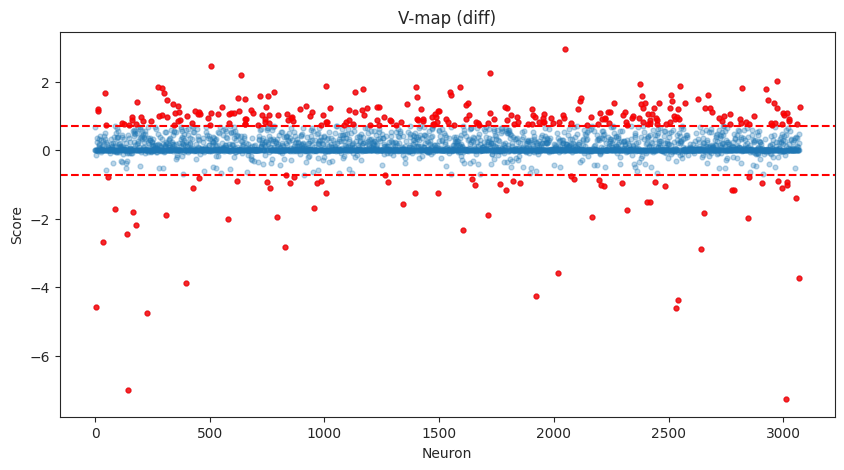

[0.99488866 0.99344389 0.99492797 0.99322985 0.99209403 0.99058572
 0.9938128  0.9942852  0.98591026 0.89111465 0.86336202]


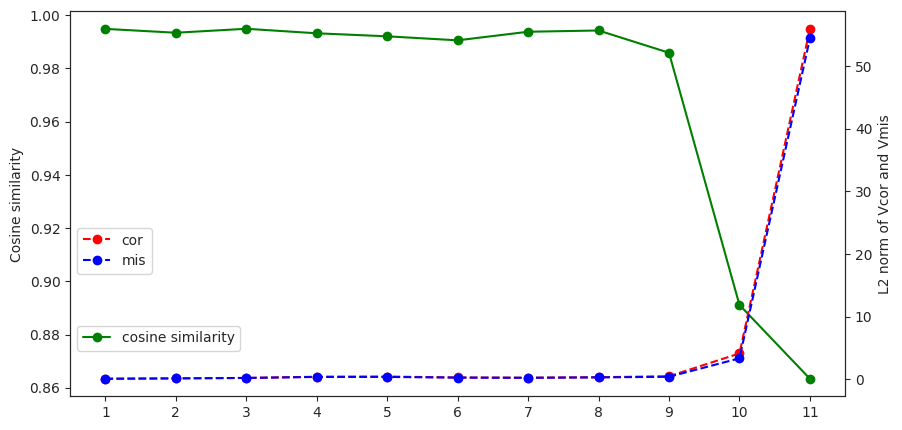

target corruption type: pixelate, cor
vscores shape: (3072, 11)
target corruption type: pixelate, mis
vscores shape: (3072, 11)
sum(condition)=308


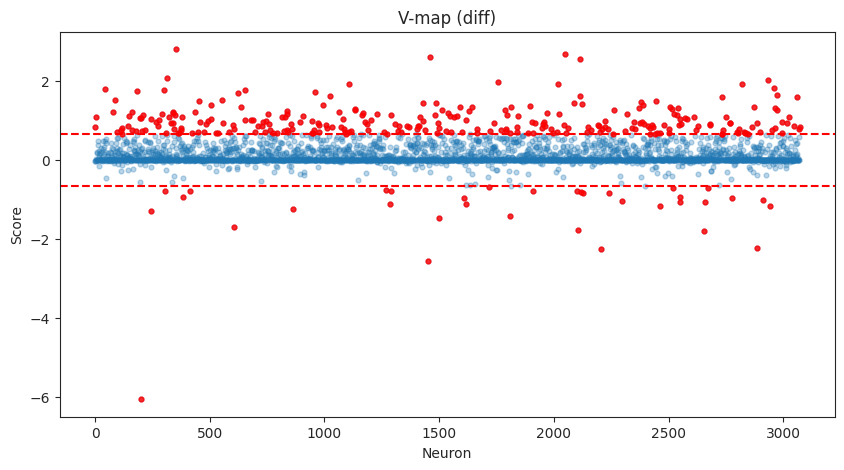

[0.99332137 0.98548835 0.98695056 0.983211   0.97876956 0.97496771
 0.99037731 0.98724421 0.97931761 0.94822061 0.90012171]


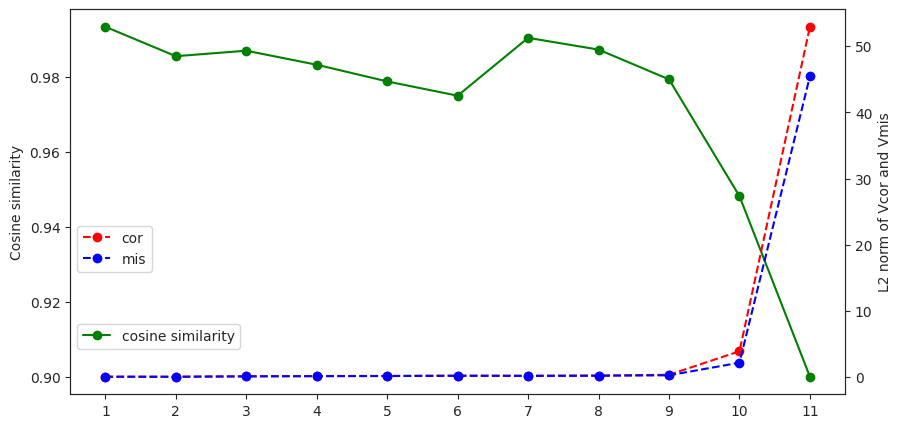

target corruption type: impulse_noise, cor
vscores shape: (3072, 11)
target corruption type: impulse_noise, mis
vscores shape: (3072, 11)
sum(condition)=308


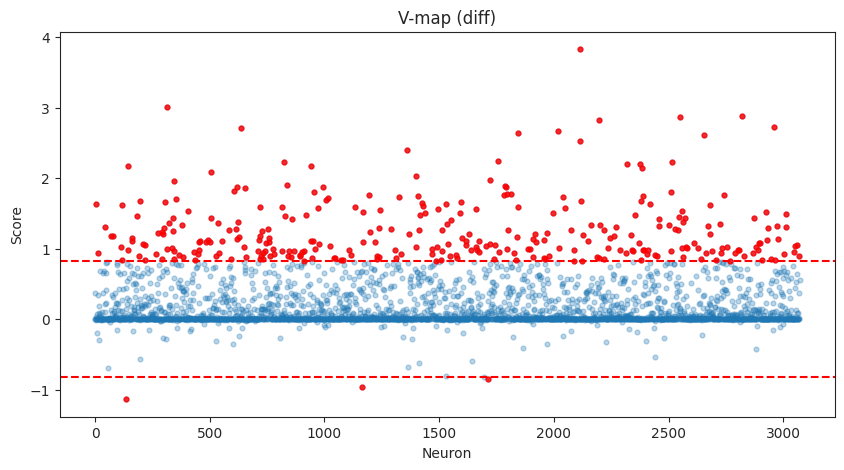

[0.98049199 0.96606423 0.9825626  0.97463581 0.97934411 0.98123842
 0.98505348 0.98987897 0.99482654 0.92636718 0.85042912]


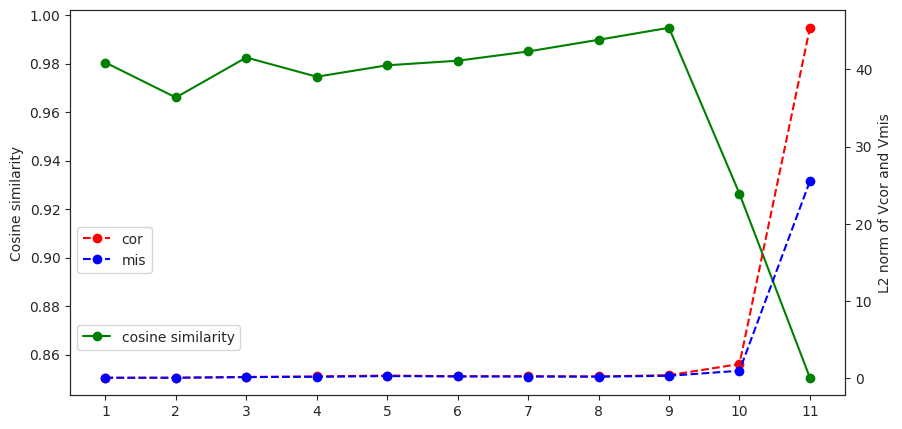

target corruption type: elastic_transform, cor
vscores shape: (3072, 11)
target corruption type: elastic_transform, mis
vscores shape: (3072, 11)
sum(condition)=308


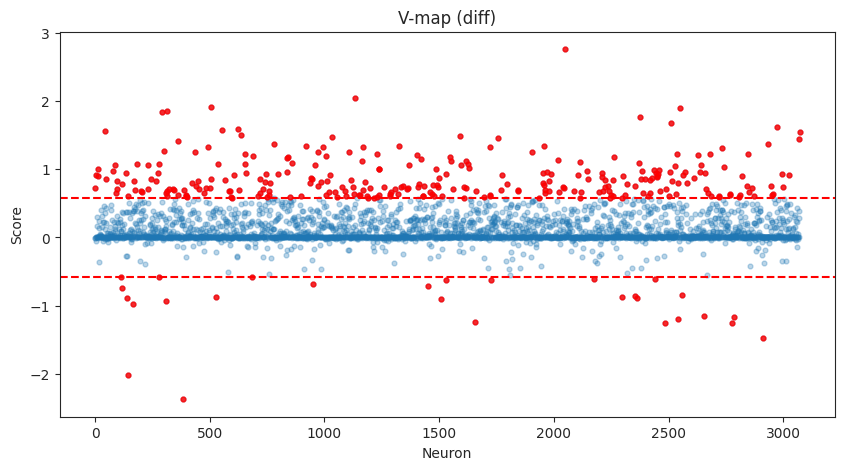

[0.99614294 0.98662805 0.98755268 0.99343231 0.9936884  0.98940171
 0.99539676 0.99128523 0.98912708 0.94547973 0.9385958 ]


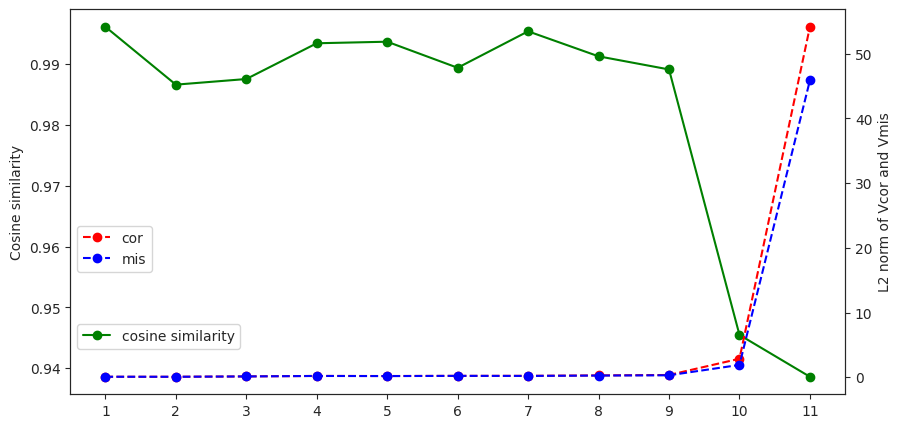

target corruption type: glass_blur, cor
vscores shape: (3072, 11)
target corruption type: glass_blur, mis
vscores shape: (3072, 11)
sum(condition)=308


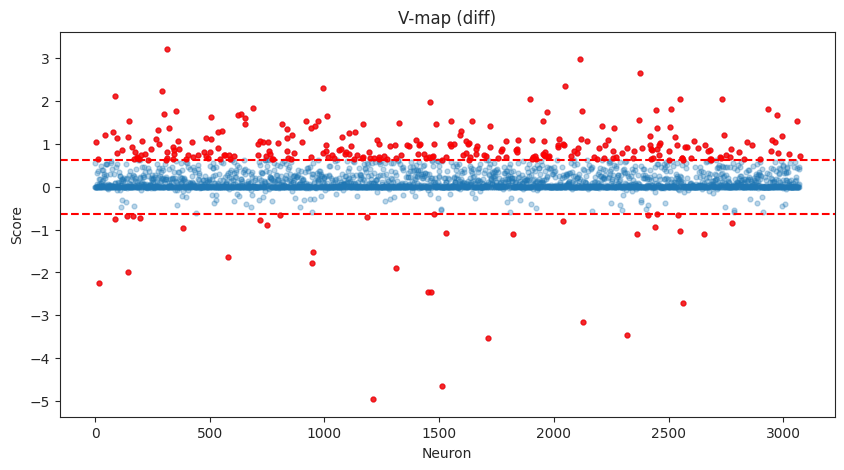

[0.99265451 0.97452614 0.97947798 0.98617854 0.98732088 0.97576046
 0.98798923 0.98858133 0.9876035  0.9002956  0.89240646]


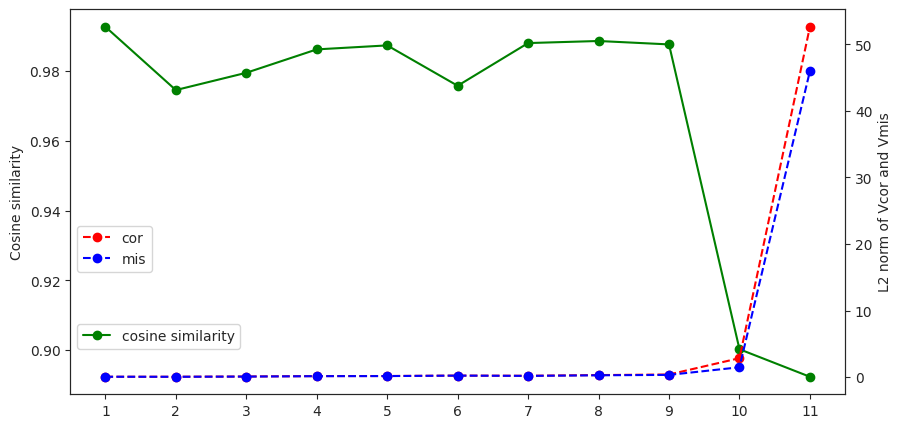

target corruption type: speckle_noise, cor
vscores shape: (3072, 11)
target corruption type: speckle_noise, mis
vscores shape: (3072, 11)
sum(condition)=308


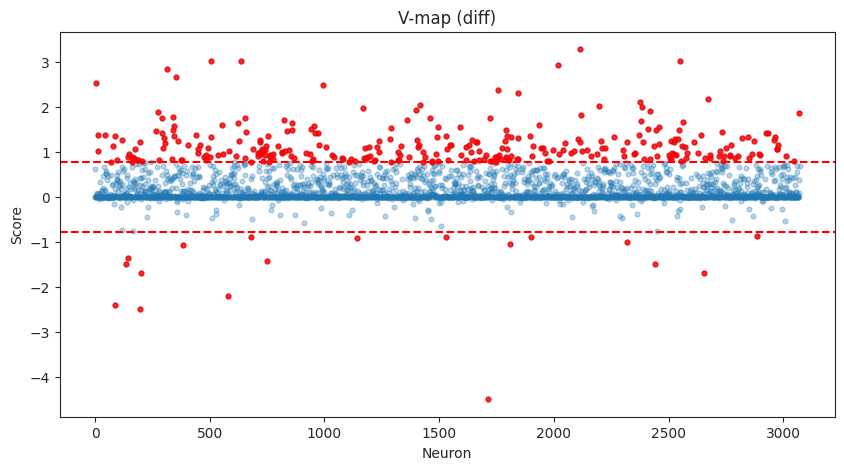

[0.98604646 0.99124179 0.99243714 0.9940394  0.99070473 0.98428578
 0.98612346 0.99087045 0.99273729 0.89700559 0.87418897]


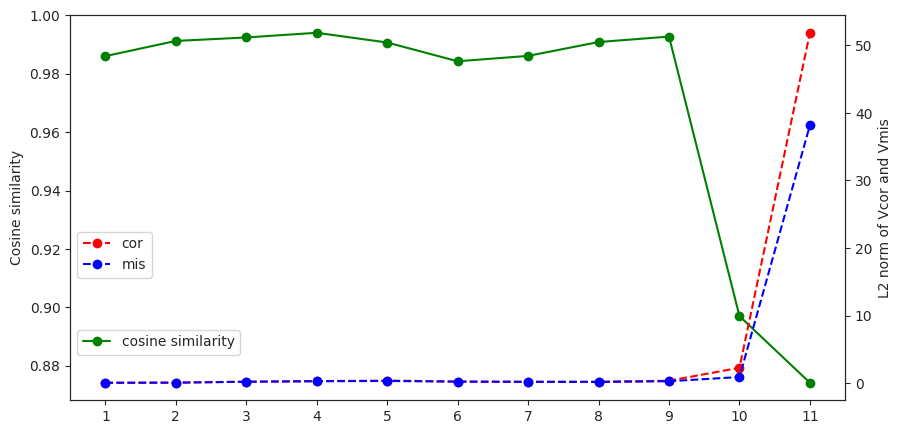

In [40]:
result_dir = os.path.join(getattr(ViTExperiment, ds_name).OUTPUT_DIR, "neuron_scores")

vmap_dic = defaultdict(defaultdict)

for used_column in ["train"]:
    print(f"\nused_column: {used_column}\n")
    vmap_dic[used_column] = defaultdict(defaultdict)
    for tgt_ct in ["ori", *ct_list]:
        vmap_dic[used_column][tgt_ct] = defaultdict(defaultdict)
        for cor_mis in ["cor", "mis"]:
            vmap_dic[used_column][tgt_ct][cor_mis] = defaultdict(np.array)
            print(f"target corruption type: {tgt_ct}, {cor_mis}")
            ds_type = f"{tgt_ct}_{used_column}"
            vscore_save_path = os.path.join(result_dir, f"vscore_l{start_li}tol{end_li}_all_label_{ds_type}_{cor_mis}.npy")
            vscores = np.load(vscore_save_path)
            vmap_dic[used_column][tgt_ct][cor_mis] = vscores.T
            print(f"vscores shape: {vmap_dic[used_column][tgt_ct][cor_mis].shape}")
        # vscoresのcorとmisの差分をヒートマップで可視化
        layers4show = [10]
        x_axis_size = len(layers4show)
        vmap_cor = vmap_dic[used_column][tgt_ct]["cor"]
        vmap_mis = vmap_dic[used_column][tgt_ct]["mis"]
        vmap_diff = vmap_cor - vmap_mis
        # for vmap in [vmap_cor, vmap_mis, vmap_diff]:
        for vmap in [vmap_diff]:
            # # heatmap
            # plt.figure(figsize=(10, 10))
            # colors = [(0, 0, 1), (0.9, 0.9, 0.9), (1, 0, 0)]  # ブルー -> 黒 -> レッド
            # cmap = LinearSegmentedColormap.from_list('blue_black_red', colors, N=256)
            # norm = TwoSlopeNorm(vmin=np.min(vmap), vcenter=0, vmax=np.max(vmap[:, layers4show]))
            # sns.heatmap(vmap[:, layers4show], annot=False, cbar=True, cmap=cmap, norm=norm)
            # plt.xlabel("Layer")
            # plt.ylabel("Neuron")
            # # x軸は1から11の1刻み，y軸は512ごとにメモリを表示
            # plt.xticks(np.arange(0.5, x_axis_size+0.5, 1), layers4show)
            # plt.yticks(np.arange(0, 3073, 512), np.arange(0, 3073, 512))
            # plt.title(f"V-map")
            # plt.show()
            # 横軸をニューロン，縦軸をスコアとした折れ線グラフ
            plt.figure(figsize=(10, 5))
            # vmap[:, layers4show] の絶対値の上位10%だけマーカーの色を赤に変える
            top10 = np.percentile(np.abs(vmap[:, layers4show]), 90)
            condition = np.abs(vmap[:, layers4show]).reshape(-1) > top10
            print(f"sum(condition)={sum(condition)}")
            # top10の値に横線を引く
            plt.axhline(y=top10, color="red", linestyle="--")
            plt.axhline(y=-top10, color="red", linestyle="--")
            plt.scatter(np.array(range(len(vmap[:, layers4show]))), vmap[:, layers4show], alpha=0.3, s=12)
            plt.scatter(np.array(range(len(vmap[:, layers4show])))[condition], vmap[:, layers4show][condition], alpha=0.8, s=12, color="red")
            plt.xlabel("Neuron")
            plt.ylabel("Score")
            plt.title(f"V-map (diff)")
            plt.show()
        # vmap_dic[used_column][tgt_ct]["cor"] と vmap_dic[used_column][tgt_ct]["mis"] の，行ごとの内積を取る
        dot_products = np.sum(vmap_cor * vmap_mis, axis=0)
        a_norms = np.linalg.norm(vmap_cor, axis=0)
        b_norms = np.linalg.norm(vmap_mis, axis=0)
        cosine_similarity = dot_products / (a_norms * b_norms)
        print(cosine_similarity) # corとmisのcos類似度
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax1.plot(cosine_similarity, color="g", marker="o", label="cosine similarity")
        ax1.set_ylabel('Cosine similarity')
        ax1.tick_params(axis='y')
        ax2 = ax1.twinx()
        ax2.plot(a_norms, color="r", marker="o", linestyle="--", label="cor")
        ax2.plot(b_norms, color="b", marker="o", linestyle="--", label="mis")
        ax2.set_xlabel("Layer")
        ax2.set_ylabel("L2 norm of Vcor and Vmis")
        # グラフに凡例を追加
        ax1.legend(loc='lower left', bbox_to_anchor=(0, 0.1))
        ax2.legend(loc='lower left', bbox_to_anchor=(0, 0.3))
        plt.xticks(np.arange(0, end_li-start_li, 1), np.arange(start_li, end_li, 1))
        plt.show()

- 赤のニューロン: cor - mis > 0 ということは，誤分類した時の分散が比較的小さい = もっと多様な振る舞いをすべき = そこにつながる重みを増幅
- 青のニューロン: cor - mis < 0 ということは，誤分類した時の分散が比較的大きい = もっと振る舞いを抑えるべき = そこにつながる重みを抑制

Vmapの絶対値を見て，その大きさのランキングの上からX%を修正対象とする．つまり，合っている場合と間違っている場合のv-scoreの乖離が大きいものから対象にする．

問題はその変更量．Vmapの値を使って該当する重みを何倍するかを決めたい．つまり，f(Vmap_ij) w_ij という操作をしたい．
Vmapの絶対値が大きいならf(Vmap)も大きいので増減の関係は同じにしたい．